In [ ]:
import time
import numpy as np
import scipy as sci
import scipy.integrate as integrate

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import animation
plt.style.use('dark_background')

from matplotlib import rc
rc("animation", html = "jshtml")

In [ ]:
#parametros
g = 9.8 #m/s^2
m = 0.5 #kg
h = 0.25 #m
R = 0.225 #m

tiempo = 2 #s
puntos = int(tiempo*200)
theta_0 = 0

#ecuaciones
def ecuacion_mov(t,w,g,m,h,R):
    theta, omega = w
    F=omega
    f=(5*g/7*R)*np.cos(theta)
    return [F,f]
    
def solucion_ecuaciones(cond_ini, g, m, h, R , time, puntos):
    t = np.linspace(0, time, puntos)
    args = (g, m, h, R)
    sol = integrate.solve_ivp(ecuacion_mov,[0,time],cond_ini,'DOP853',t,args=args)
    return sol

def polares_a_catesianas(soluciones, R):
    x1 = R * np.cos(soluciones[0,:])
    y1 = - R * np.sin(soluciones[0,:])
    return np.array([x1, y1])

cond_ini = np.array([0,0])
sol = solucion_ecuaciones(cond_ini,g,m,h,R,tiempo,puntos)
data = polares_a_catesianas(sol.y, R)

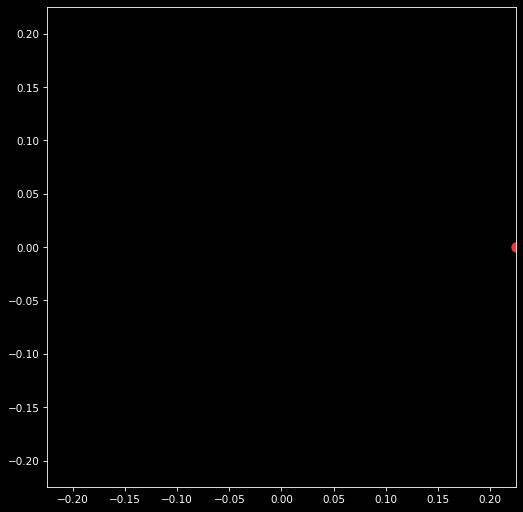

In [ ]:
fps = 24

def update(num_frame,d,elements,paso):
    j = num_frame * paso
    masa, trayectoria = elements
    masa.set_offsets(d[:,j:j+1].T)
    trayectoria.set_data(d[:,0:j+1])
    return masa,trayectoria

def inicializar_elementos_graficos(d,m,ax):
    masa = ax.scatter(d[0, :1], d[1, :1] ,s=80,c='#ff3030')
    trayectoria, = ax.plot(d[0, :1], d[1, :1],c='#ff3030', zorder=-1)
    return masa, trayectoria

def ajustar_ejes_coordenados(R):
    fig = plt.figure(figsize = (7,7), dpi = 75)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1) #margen
    ax = fig.gca()
    plt.tight_layout()
    plt.xlim([-R, R])
    plt.ylim([-R, R])
    return fig, ax

def crear_animacion(data, R, m, time, fps, name):
    N = time*fps
    paso = int(np.floor(data.shape[1] / N))
    if paso<1: raise ValueError('Escoje puntos > '+ str(N))
    fig, ax = ajustar_ejes_coordenados(R)
    elements = inicializar_elementos_graficos(data,m,ax)
    ani = animation.FuncAnimation(fig,update,N,fargs=(data,elements,paso))
    return ani
start_time = time.time()
crear_animacion(data,R,m,tiempo,fps,'cuna_circular.gif')

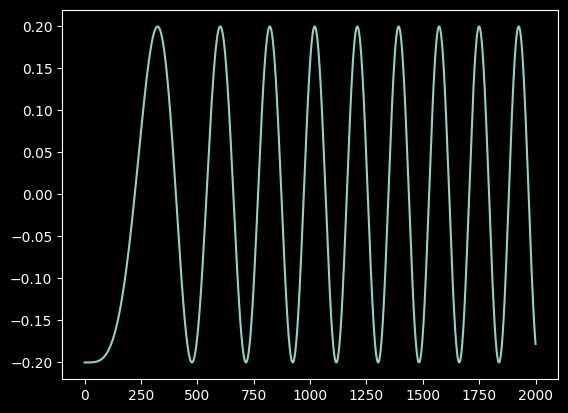

In [ ]:
#parametros
g = 9.8 #m/s^2
m = 0.082 #kg
M = 0.194 #kg
l = 0.2 #m
mu = 0.1 # coeficiente de fricción (debe ser definido apropiadamente)
b = 0.5 #coeficiente de arrastre 
I = ((M/12)*(pow(l,2) + pow(0.02,2))+ M*pow(l/3,2))
tiempo = 10#s
puntos = int(tiempo*200)
theta_0 = 0

#ecuaciones
def dxdot(theta, omega, x, xdot, g, l, m, M, mu, b, I):
    num= m*l*g*np.sin(theta) - mu*xdot - m*l*omega**2*np.sin(theta)
    denom = M + m - m*(np.cos(theta))**2
    return num/denom

def domega(theta, omega, x, xdot, g, l, m, M, mu, b, I):
    num = g*np.sin(theta) - mu/M*omega - (m*l*omega**2*np.sin(theta)*np.cos(theta))/(M+m)
    denom = l * (1- (m/M)*(np.cos(theta))**2)
    return num/denom

def ecuacion_mov(t, w, g, l, m, M, mu, b, I):
    theta, omega, x, xdot = w
    F1=omega
    F2= xdot
    f1= domega(theta, omega, x, xdot, g, l, m, M, mu, b, I)
    f2= dxdot(theta, omega, x, xdot, g, l, m, M, mu, b, I)
    return [F1,F2,f1,f2]

def solucion_ecuaciones(cond_ini, g, l, m, M, mu,b,I,time, puntos):
    t = np.linspace(0, time, puntos)
    args = (g, l, m, M, mu,b, I)
    sol = integrate.solve_ivp(ecuacion_mov,[0,time],cond_ini,'RK45',t,args=args)
    return sol

def polares_a_catesianas(soluciones, l):
    x2 = soluciones[1,:]
    y2 = np.zeros(soluciones[1,:].shape[0])
    x1 = x2 + l * np.sin(soluciones[0,:])
    y1 = - l * np.cos(soluciones[0,:])
    return np.array([x1, y1,x2,y2])

cond_ini = np.array([0,0,0,3])
sol = solucion_ecuaciones(cond_ini,g, l, m, M, mu,b, I, tiempo,puntos)
data = polares_a_catesianas(sol.y, l)

x= np.linspace(0,data[1,:].shape[0],data[1,:].shape[0])
plt.plot(x,data[1,:])
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

fps = 24

def update(num_frame, data, elements, paso):
    j = num_frame * paso
    pendulo, trayectoria_pendulo, carrito, trayectoria_carrito = elements
    pendulo.set_offsets(data[[0,1], j])
    trayectoria_pendulo.set_data(data[0, :j+1], data[1, :j+1])
    carrito.set_offsets(data[[2,3], j])
    trayectoria_carrito.set_data(data[2, :j+1], data[3, :j+1])
    return pendulo, trayectoria_pendulo, carrito, trayectoria_carrito

def inicializar_elementos_graficos(data, ax):
    pendulo = ax.scatter(*data[[0,1], 0], s=80, c='#ff3030')
    trayectoria_pendulo, = ax.plot(*data[[0,1], :1], c='#ff3030', zorder=-1)
    carrito = ax.scatter(*data[[2,3], 0], s=80, c='blue')
    trayectoria_carrito, = ax.plot(*data[[2,3], :1], c='blue', zorder=-1)
    return pendulo, trayectoria_pendulo, carrito, trayectoria_carrito

def ajustar_ejes_coordenados():
    fig, ax = plt.subplots(figsize = (7,7), dpi = 75)
    plt.tight_layout()
    ax.set_xlim(-2, 10)
    ax.set_ylim(-0.5, 0.5)
    return fig, ax

def crear_animacion(data, tiempo, fps, name):
    N = tiempo*fps
    paso = max(int(data.shape[1] / N), 1)
    fig, ax = ajustar_ejes_coordenados()
    elements = inicializar_elementos_graficos(data, ax)
    ani = animation.FuncAnimation(fig, update, frames=N, fargs=(data, elements, paso), blit=True)
    ani.save(name, fps=fps, writer='pillow')
    return ani

ani = crear_animacion(data, tiempo, fps, 'intento_soluciòn_general.gif')



NameError: name 'data' is not defined